# Uber Fare Prediction

#### DESCRIPTION

Design an algorithm that will tell the fare to be charged for a passenger.

Problem Statement Scenario:

A fare calculator helps a customer in identifying the fare valid for the trip. They are often used by passengers who are new to a city or tourists to get an estimate of the travel costs.
You are provided with a dataset with features like fare amount, pickup and drop location, passenger count, and so on.

Following actions should be performed:

1) Understand the type of data.

2) Identify the output variable.

3) Identify the factors which affect the output variable.

4) Check if there are any biases in your dataset.

5) Count the null values existing in columns.

6) Remove the null value rows in the target variable.

7) Perform train test split.

8) Predict the accuracy using regression models.

9) Check and compare the accuracy of the different models.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [92]:
df = pd.read_csv("uber_train.csv")

In [93]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [94]:
df.shape

(20000, 8)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                20000 non-null  object 
 1   fare_amount        20000 non-null  float64
 2   pickup_datetime    20000 non-null  object 
 3   pickup_longitude   20000 non-null  float64
 4   pickup_latitude    20000 non-null  float64
 5   dropoff_longitude  20000 non-null  float64
 6   dropoff_latitude   20000 non-null  float64
 7   passenger_count    20000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


In [96]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,11.303321,-72.478584,39.921043,-72.497221,39.913606,1.658000
std,9.541637,10.525376,6.678592,10.460530,6.139231,1.283674
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992150,40.734706,-73.991224,40.734537,1.000000
50%,8.500000,-73.981711,40.752680,-73.980216,40.753583,1.000000
75%,12.500000,-73.966802,40.767443,-73.963729,40.768135,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


### 1) Treating Fare Column:

**Minimum Fare Value is -3, which is not Possible.**
**So, there is atleast one or more Observation in Data with Negative Fare Value.**
**We will Drop that Rows.**

In [97]:
df = df[df["fare_amount"] > 0]

In [98]:
df.shape

(19996, 8)

In [99]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000
mean,11.306003,-72.478291,39.920885,-72.496931,39.913447,1.657982
std,9.540692,10.526409,6.679250,10.461556,6.139835,1.283670
min,0.010000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992148,40.734709,-73.991221,40.734544,1.000000
50%,8.500000,-73.981709,40.752686,-73.980214,40.753589,1.000000
75%,12.500000,-73.966802,40.767446,-73.963729,40.768137,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


### 2) Treating Longitude and Latitude Columns:

**Latitude and longitude are a pair of numbers (coordinates) used to describe a position on the plane of a geographic coordinate system. The numbers are in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude.**

**pickup_latitude has a maximum value of 401.08, which is not possible. We will Drop Rows having pickup_latitude value > 90.**

In [100]:
df = df[df["pickup_latitude"] <= 90]

In [101]:
df.shape

(19995, 8)

In [102]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000
mean,11.306403,-72.478218,39.902822,-72.496858,39.913404,1.658015
std,9.540763,10.526667,6.171743,10.461813,6.139985,1.283694
min,0.010000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992149,40.734709,-73.991221,40.734544,1.000000
50%,8.500000,-73.981710,40.752685,-73.980215,40.753587,1.000000
75%,12.500000,-73.966808,40.767443,-73.963737,40.768136,2.000000
max,180.000000,40.766125,41.366138,40.802437,41.366138,6.000000


### 3) Understand the type of data:

In [103]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [104]:
df["key"].nunique()

19995

In [105]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


**We can Convert "pickup_datetime" in Date Time Object so that it can be used to Extract Information like Year, Month, Date, Weekday etc.**

In [106]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [107]:
df.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [108]:
df["Day"] = df["pickup_datetime"].dt.day

In [109]:
df["Month"] = df["pickup_datetime"].dt.month

In [110]:
df["Year"] = df["pickup_datetime"].dt.year

In [111]:
df["Hour"] = df["pickup_datetime"].dt.hour

In [112]:
df["Weekday"] = df["pickup_datetime"].dt.weekday

In [113]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Day,Month,Year,Hour,Weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,1


**We can Now Set "key" as Index as it has Unique value for all observations and we can drop "pickup_datetime" as it has been converted in more useful information like year, month, day, weekday and hour.**

In [114]:
df = df.set_index("key")

In [115]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Day,Month,Year,Hour,Weekday
key,,,,,,,,,,,,
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,0
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,3
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,5
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,1


In [116]:
df = df.drop("pickup_datetime", axis= 1)

In [117]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Day,Month,Year,Hour,Weekday
key,,,,,,,,,,,
2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,0
2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,1
2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,3
2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,5
2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,1


### 4) Identify the output variable:

In [118]:
# "fare_amount" is our Target / Output Variable.

<Figure size 1600x1200 with 0 Axes>

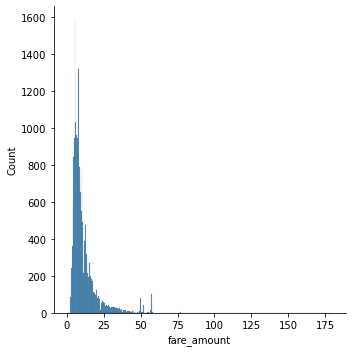

In [119]:
plt.figure(figsize= (8,6), dpi= 200)

sns.displot(data= df, x= "fare_amount")

plt.show()

**fare_amount distribution is Highly Right Skewed shoeing that most of the rides have fare amounts in Range of 0-50.**

### 5)  Identify the factors which affect the output variable:

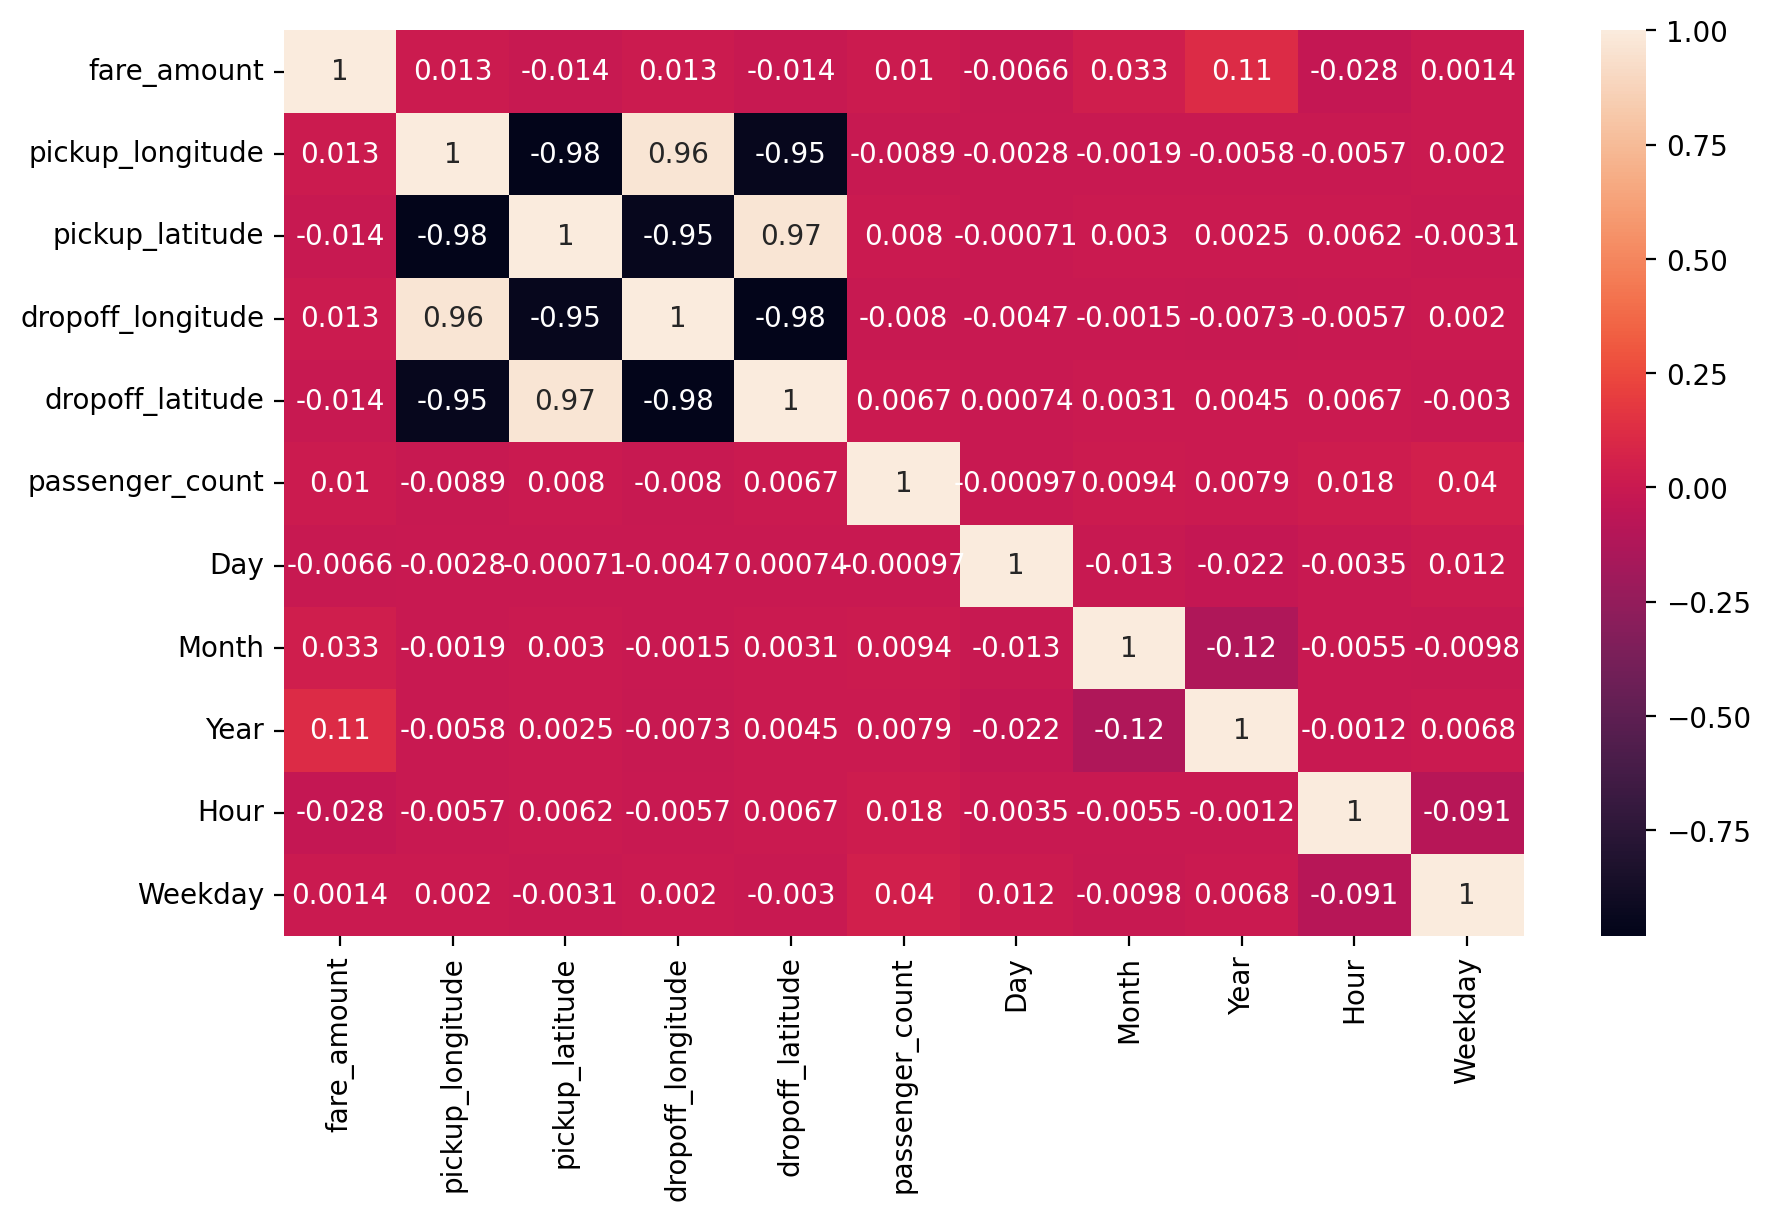

In [120]:
plt.figure(figsize= (10,6), dpi= 200)

sns.heatmap(df.corr(), annot= True)

plt.show()

**Fare Amount has no considerable Positive or Negative Correlation with any Feature.**

### 6) Check if there are any biases in your dataset:

**There are High Correlations Between Latitudes and Longitudes, which are obvious.**

**No other Multicolinearity or Biases in data.**

### 7) Count the null values existing in columns:

In [121]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Day                  0
Month                0
Year                 0
Hour                 0
Weekday              0
dtype: int64

**There are No Missing Values in Data.**

### 8) EDA:

In [122]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Day,Month,Year,Hour,Weekday
key,,,,,,,,,,,
2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,0
2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,1
2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,3
2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,5
2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,1


<Figure size 1600x1200 with 0 Axes>

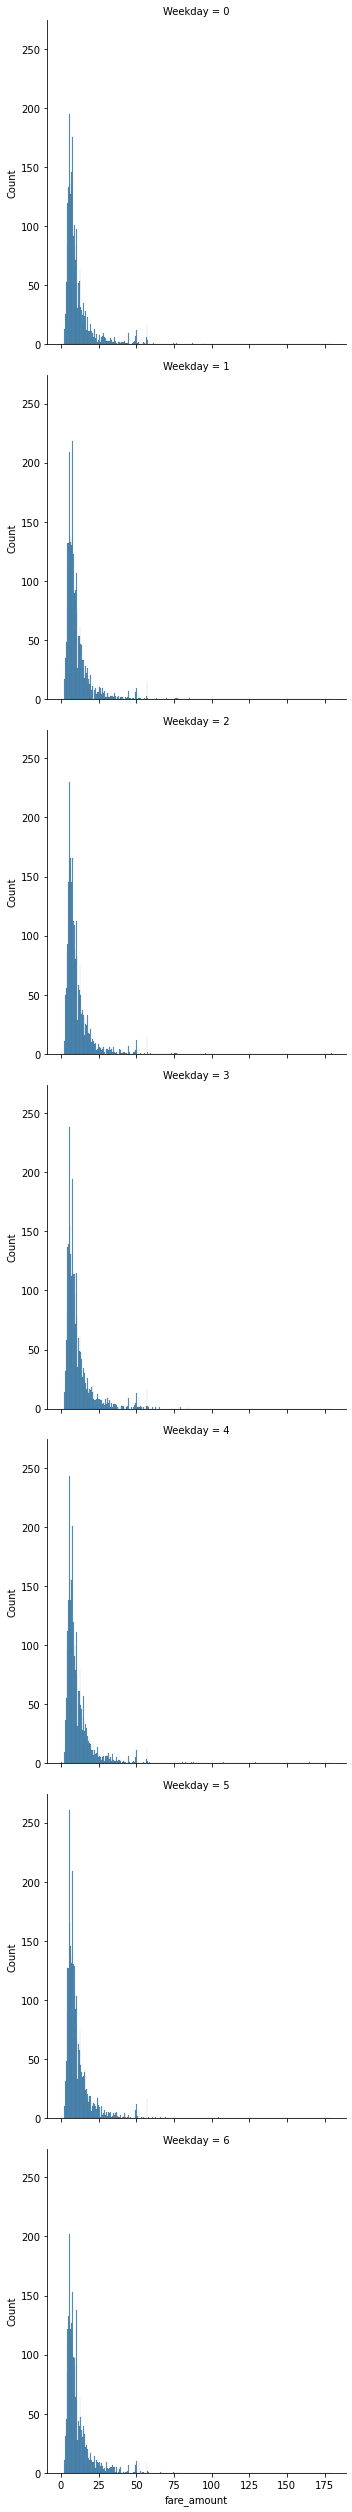

In [123]:
# Fare Amount vs. Weekday:

plt.figure(figsize= (8,6), dpi= 200)

sns.displot(data= df, x= "fare_amount", row= "Weekday")

plt.show()

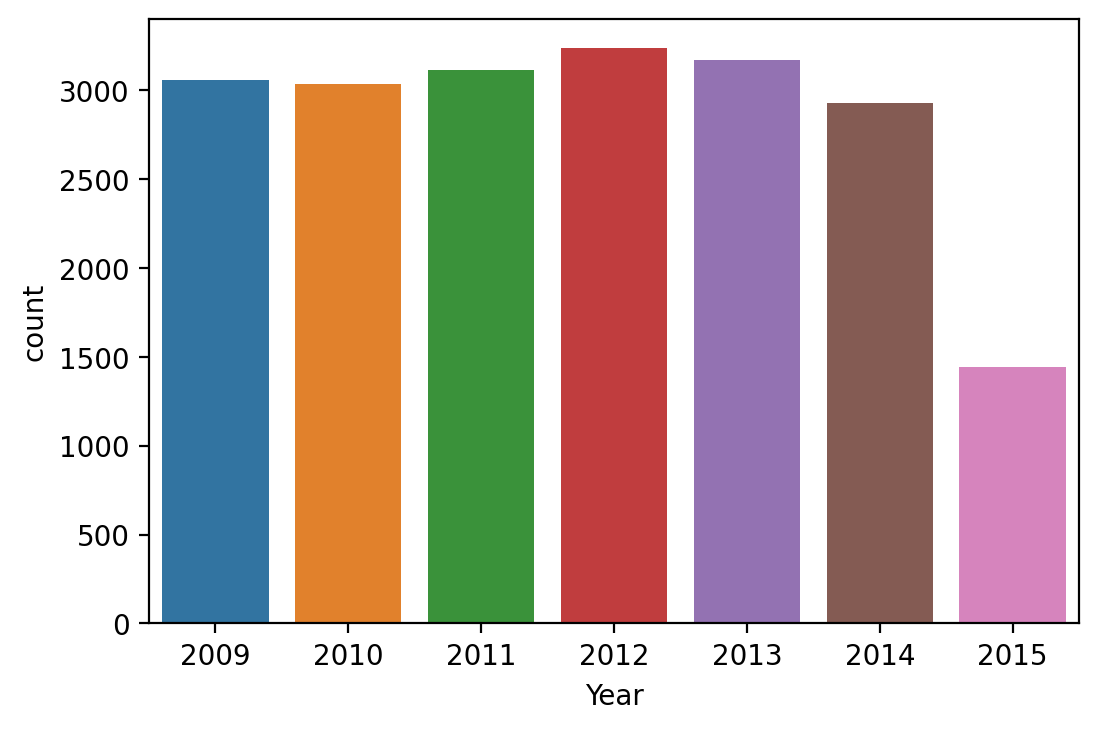

In [124]:
plt.figure(figsize= (6,4), dpi= 200)

sns.countplot(data= df, x= "Year")

plt.show()

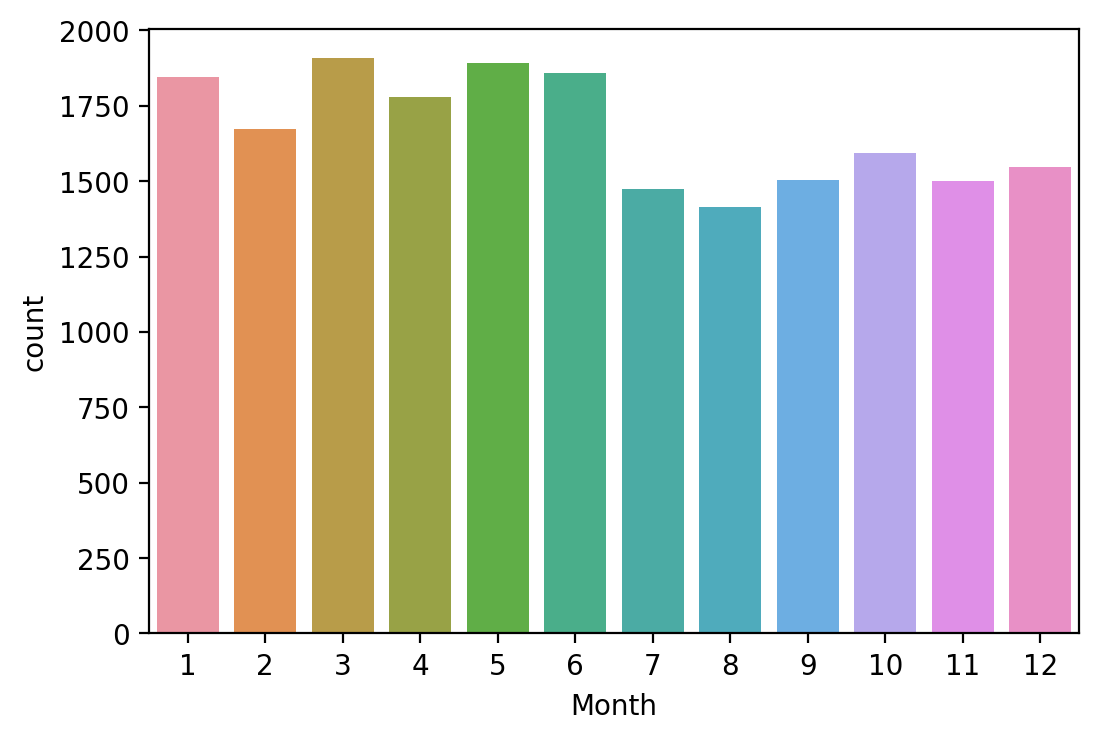

In [125]:
plt.figure(figsize= (6,4), dpi= 200)

sns.countplot(data= df, x= "Month")

plt.show()

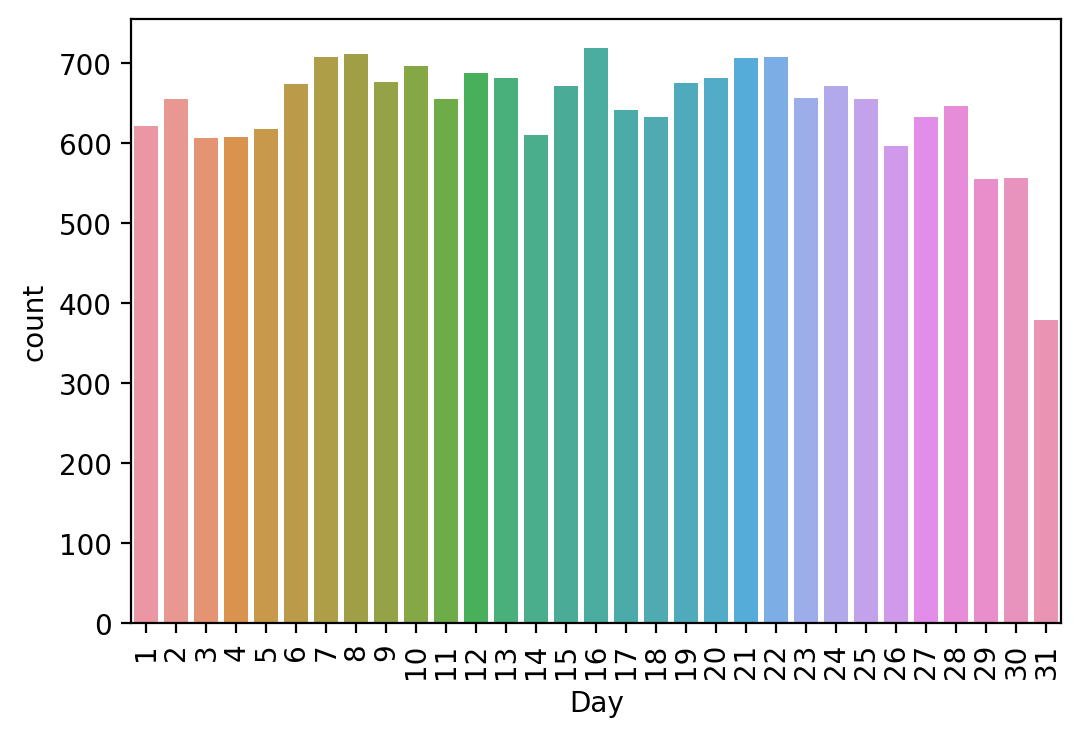

In [126]:
plt.figure(figsize= (6,4), dpi= 200)

sns.countplot(data= df, x= "Day")

plt.xticks(rotation= 90)

plt.show()

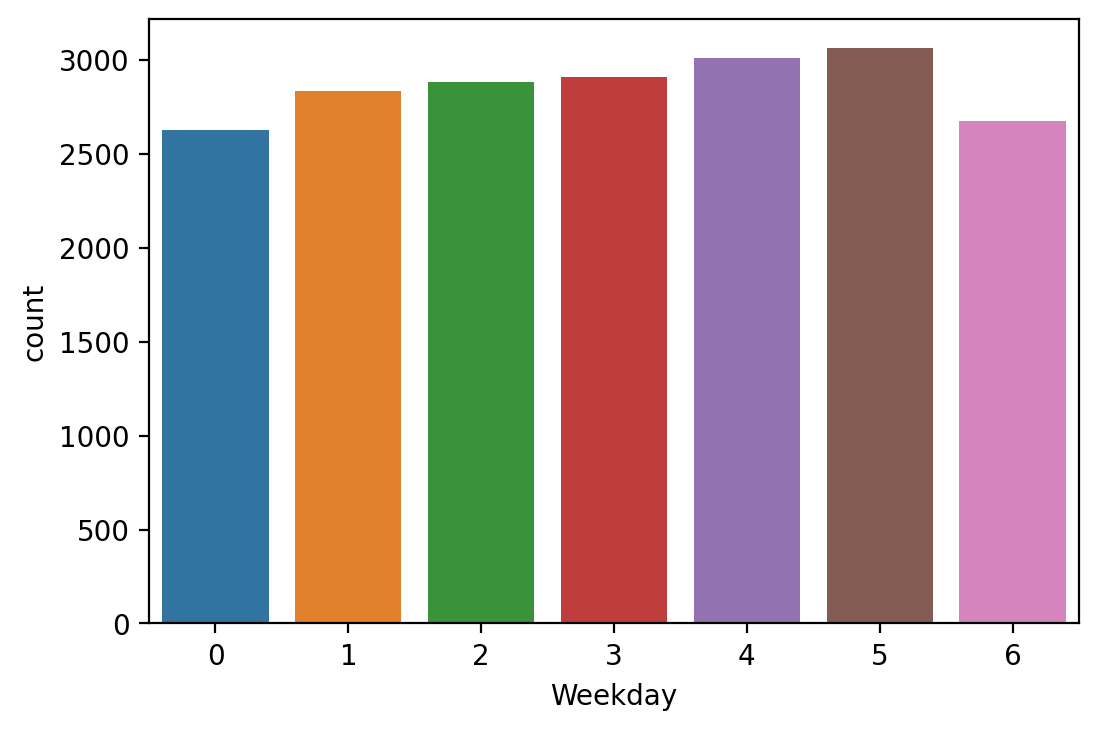

In [127]:
plt.figure(figsize= (6,4), dpi= 200)

sns.countplot(data= df, x= "Weekday")

plt.show()

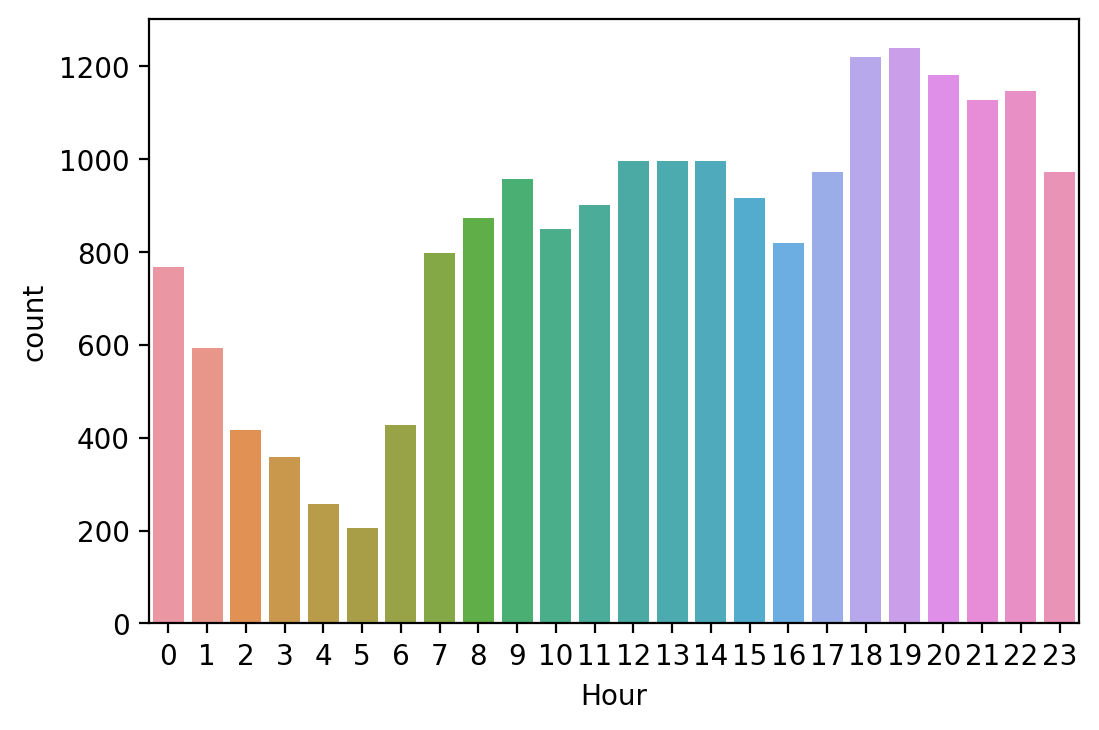

In [128]:
plt.figure(figsize= (6,4), dpi= 200)

sns.countplot(data= df, x= "Hour")

plt.show()

### 9) Dummy Variable for Categorical Features:

In [129]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
Day                    int64
Month                  int64
Year                   int64
Hour                   int64
Weekday                int64
dtype: object

In [130]:
for col in df.columns:
    print(col)
    print(df[col].nunique())

fare_amount
479
pickup_longitude
16649
pickup_latitude
17300
dropoff_longitude
16854
dropoff_latitude
17376
passenger_count
7
Day
31
Month
12
Year
7
Hour
24
Weekday
7


**We need to get Dummy Variables for Day, Month, Year, Hour and Weekday as they are all Nominal Categorical Features.**

**Passenger Count is Discrete Feature.**

In [131]:
df = pd.get_dummies(data= df, columns=["Day","Month","Year","Hour","Weekday"], drop_first= True)

In [132]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Day_2,Day_3,Day_4,Day_5,...,Hour_20,Hour_21,Hour_22,Hour_23,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
key,,,,,,,,,,,,,,,,,,,,,
2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [133]:
df.shape

(19995, 82)

### 10) Train Test Split:

In [134]:
x = df.drop("fare_amount", axis= 1)

In [135]:
y = df["fare_amount"]

In [136]:
x.shape

(19995, 81)

In [137]:
y.shape

(19995,)

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [139]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14996, 81)
(4999, 81)
(14996,)
(4999,)


### 11) Scalling:

In [140]:
sc= StandardScaler()

In [141]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, index= x_train.index, columns= x_train.columns)
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_20,Hour_21,Hour_22,Hour_23,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
key,,,,,,,,,,,,,,,,,,,,,
2010-12-06 00:05:03.0000003,-0.140926,0.138612,-0.140013,0.136520,-0.514504,-0.183985,-0.175484,-0.174877,-0.178688,5.395595,...,-0.249681,-0.245586,-0.247109,-0.227185,-0.409217,-0.408661,-0.414422,-0.418941,-0.421906,-0.394779
2009-06-16 09:54:18.0000002,-0.141719,0.136777,-0.142525,0.134269,-0.514504,-0.183985,-0.175484,-0.174877,-0.178688,-0.185336,...,-0.249681,-0.245586,-0.247109,-0.227185,2.443694,-0.408661,-0.414422,-0.418941,-0.421906,-0.394779
2009-05-03 03:01:00.000000184,-0.139085,0.123890,-0.138784,0.123639,-0.514504,-0.183985,5.698527,-0.174877,-0.178688,-0.185336,...,-0.249681,-0.245586,-0.247109,-0.227185,-0.409217,-0.408661,-0.414422,-0.418941,-0.421906,2.533065
2014-09-10 04:05:24.0000001,-0.141919,0.139141,-0.139886,0.138048,0.263974,-0.183985,-0.175484,-0.174877,-0.178688,-0.185336,...,-0.249681,-0.245586,-0.247109,-0.227185,-0.409217,2.447015,-0.414422,-0.418941,-0.421906,-0.394779
2009-09-01 17:32:00.000000173,-0.142148,0.141978,-0.139851,0.141285,-0.514504,-0.183985,-0.175484,-0.174877,-0.178688,-0.185336,...,-0.249681,-0.245586,-0.247109,-0.227185,2.443694,-0.408661,-0.414422,-0.418941,-0.421906,-0.394779


In [142]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, index= x_test.index, columns= x_test.columns)
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_20,Hour_21,Hour_22,Hour_23,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
key,,,,,,,,,,,,,,,,,,,,,
2010-02-26 20:33:44.0000002,-0.141562,0.141994,-0.140264,0.141338,-0.514504,-0.183985,-0.175484,-0.174877,-0.178688,-0.185336,...,4.005110,-0.245586,-0.247109,-0.227185,-0.409217,-0.408661,-0.414422,2.386971,-0.421906,-0.394779
2014-10-25 11:25:29.0000004,-0.143064,0.132272,-0.140852,0.137543,-0.514504,-0.183985,-0.175484,-0.174877,-0.178688,-0.185336,...,-0.249681,-0.245586,-0.247109,-0.227185,-0.409217,-0.408661,-0.414422,-0.418941,2.370196,-0.394779
2014-08-21 21:54:00.00000073,-0.142391,0.136571,-0.140900,0.129913,0.263974,-0.183985,-0.175484,-0.174877,-0.178688,-0.185336,...,-0.249681,4.071892,-0.247109,-0.227185,-0.409217,-0.408661,2.412999,-0.418941,-0.421906,-0.394779
2014-06-28 01:24:57.0000001,-0.144838,0.129194,-0.143426,0.127776,-0.514504,-0.183985,-0.175484,-0.174877,-0.178688,-0.185336,...,-0.249681,-0.245586,-0.247109,-0.227185,-0.409217,-0.408661,-0.414422,-0.418941,2.370196,-0.394779
2012-01-11 06:22:00.0000001,-0.142484,0.138994,-0.140500,0.139326,1.042453,-0.183985,-0.175484,-0.174877,-0.178688,-0.185336,...,-0.249681,-0.245586,-0.247109,-0.227185,-0.409217,2.447015,-0.414422,-0.418941,-0.421906,-0.394779


### 12) Random Forest Regressor:

In [144]:
rf_model = RandomForestRegressor(n_estimators= 100)

In [145]:
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [147]:
pred = rf_model.predict(x_test)

In [148]:
r2_score(y_test, pred)

0.7624701330526458

### 13) XGB Regressor:

In [149]:
xgb_model = XGBRegressor(n_estimators= 100)

In [150]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
pred = xgb_model.predict(x_test)

In [152]:
r2_score(y_test, pred)

0.754563916499755